# K-Means

K-means é um algoritmo de hard clustering baseado em centroides (técnica de partição) . Se baseia na identificação de k grupos - sendo k um parâmetro definido pelo usuário - obtidos iterativamente via cuja função objetiva a ser minimizada é a variância intra-cluster (inercia):

$ J= ∑_{i=1}^m|| μ_i  −x_i ||^2 $

É um algoritmo iterativo, em que após a inicialização dos centroides, repetem-se dois passos até convergência: 

	- registros são associados a aquele centroide mais próximo (para a qual se define uma métrica de distância, usualmente a euclidiana para variáveis contínuas
	- os centroides são recalculados - utilizando-se da média das coordenadas dos pontos que compõem o cluster (as k médias)

 O modelo busca identificar de maneira iterativa os k centroides que melhor se ajustem aos dados, minimizando as distâncias os pontos que compõem o cluster e o respectivo centroide associado - assim a cada passo se diminui a inercia ou variância intra-cluster. 

O algoritmo funciona bem para clusters convexos e isotrópicos - e quando não se têm tamanhos muito diferentes de clusters.


**Some observations**

- find cluster centers (k) that are representative of certain regions of the data;
- 2 steps: assign each data point to the closest cluster center - and them setting each center as the mean of the data points that are assigned to it
-  We don't know what it will be each one of the cluster at the end of the process - it can be difficult to determine the optimal number of clusters
- It can be view as a decomposition method (each point is represented using only a single component - cluster center)

    step 1 - Choose K number of clusters
    step 2 - Select at random K points, the centroids (not necessarily from your dataset)
    step 3 -assign each data point to the closest centroid
    step 4 - Compute and place the new centroid of each cluster
    step 5 - Reassing each data point to the new closest centroid. If any reassigment took place, go to step 4, otherwise -END

In [225]:
# import mglearn.plots
# mglearn.plots.plot_kmeans_algorithm()

In [226]:
# mglearn.plots.plot_kmeans_boundaries()

In [355]:
#Import Libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [379]:
from sklearn.datasets import make_blobs
blobs = make_blobs(random_state=10, n_samples=200,cluster_std=2)
X= blobs[0]
y= blobs[1]

Text(0, 0.5, 'Y')

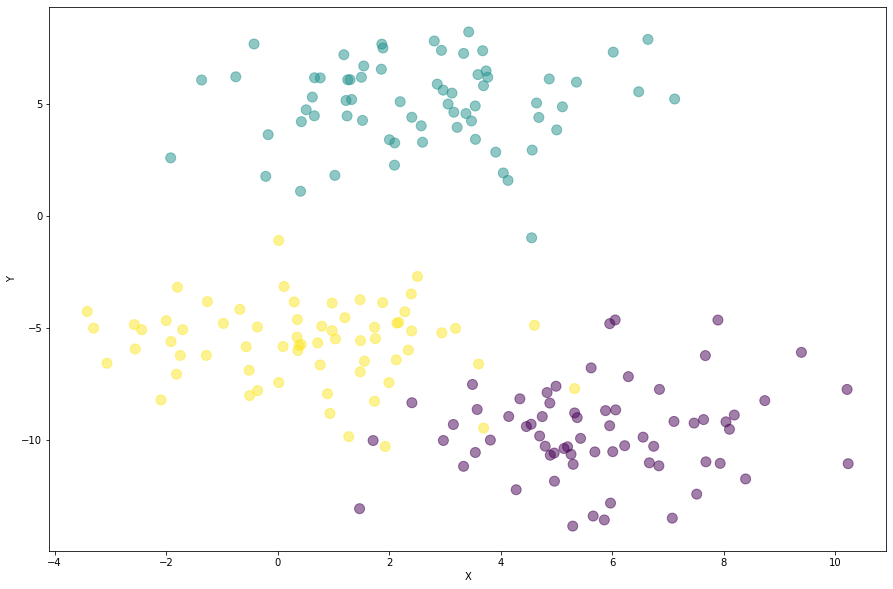

In [381]:
figure=plt.figure(figsize=(15,10))
plt.scatter(X[:,0], X[:,1], c=y, s=100, alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')

In [382]:
def inertia(X, y, centroids):
    
    inertia = 0
    
    for centroid in np.unique(y):
        
        points_ = X[labels==centroid]
        centroid_ = centroids[centroid]
        
        for p in points_:
            inertia += (p[0] - centroid_[0])**2 + (p[1] - centroid_[1])**2
        
    return inertia
    

Text(0, 0.5, 'Score')

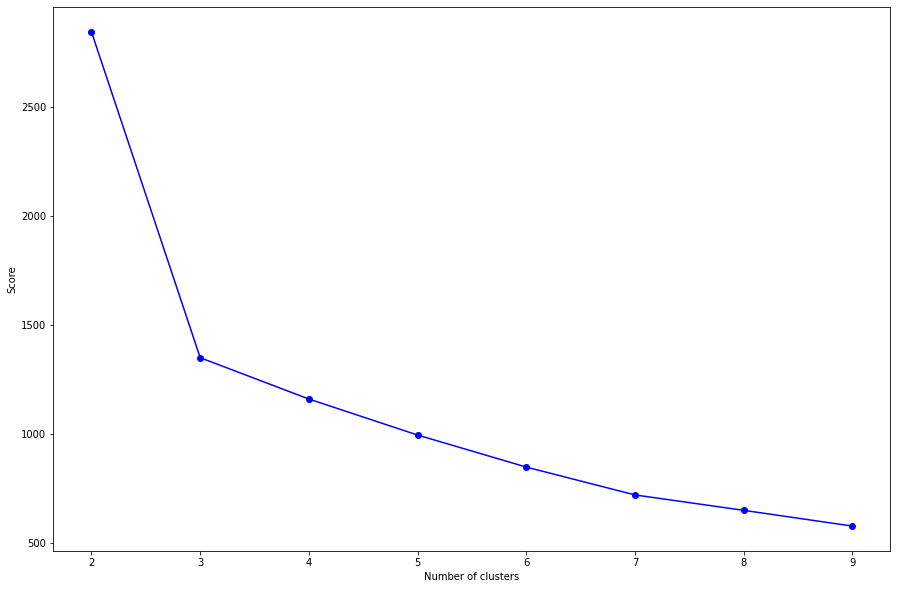

In [383]:
scores=[]

for i in range(2,10):
    clustering = KMeans(n_clusters=i)
    clustering.fit(X)
    labels = clustering.predict(X)
#     print(inertia(X, labels, K_model.cluster_centers_))
    scores.append(abs(clustering.score(X)))
#     print(scores)
    
figure=plt.figure(figsize=(15,10))
plt.plot(np.arange(2,10), scores,'blue', marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Score')

For n_clusters = 2 The average silhouette_score is : 0.6352771118403687
For n_clusters = 3 The average silhouette_score is : 0.5815214844418355
For n_clusters = 4 The average silhouette_score is : 0.5026755775983065
For n_clusters = 5 The average silhouette_score is : 0.38075597166557806
For n_clusters = 6 The average silhouette_score is : 0.3270569290260441
For n_clusters = 7 The average silhouette_score is : 0.33915714443811157


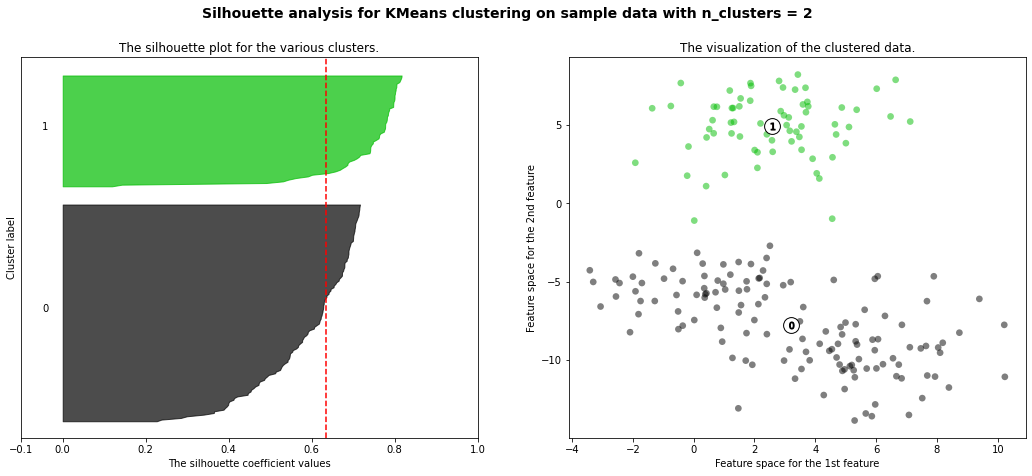

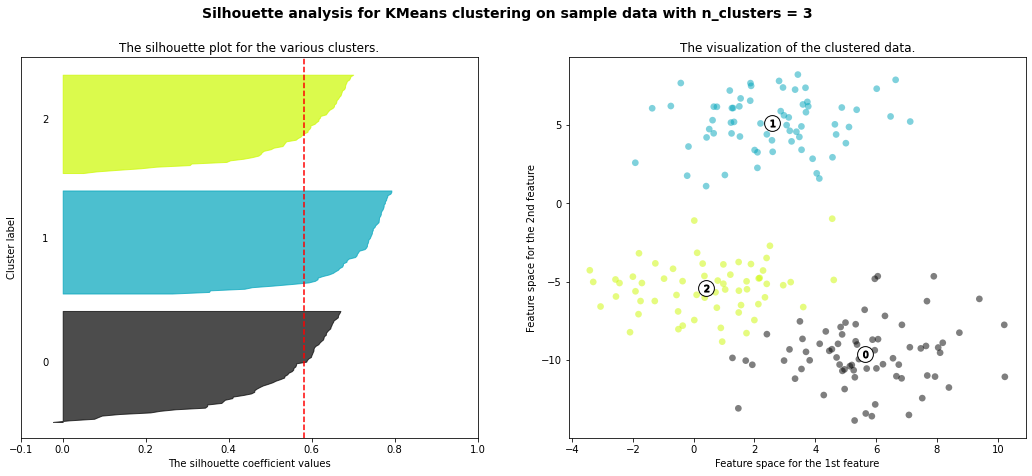

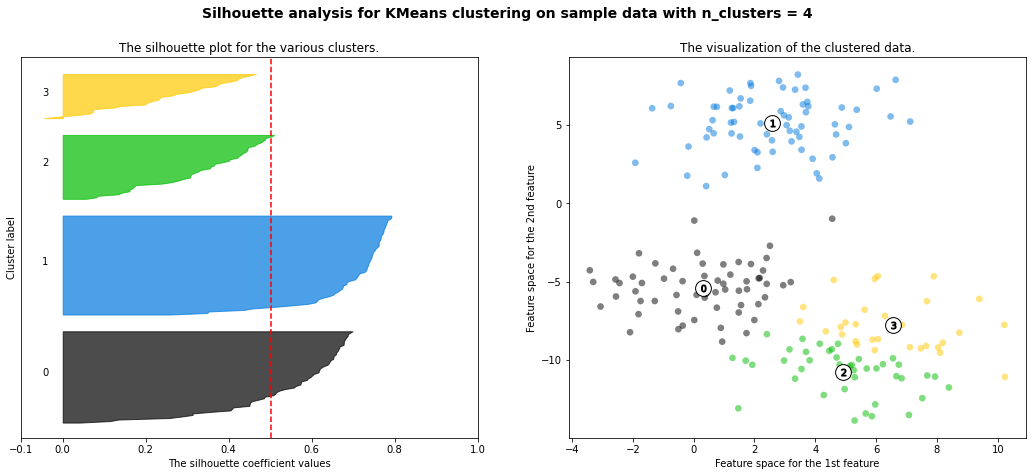

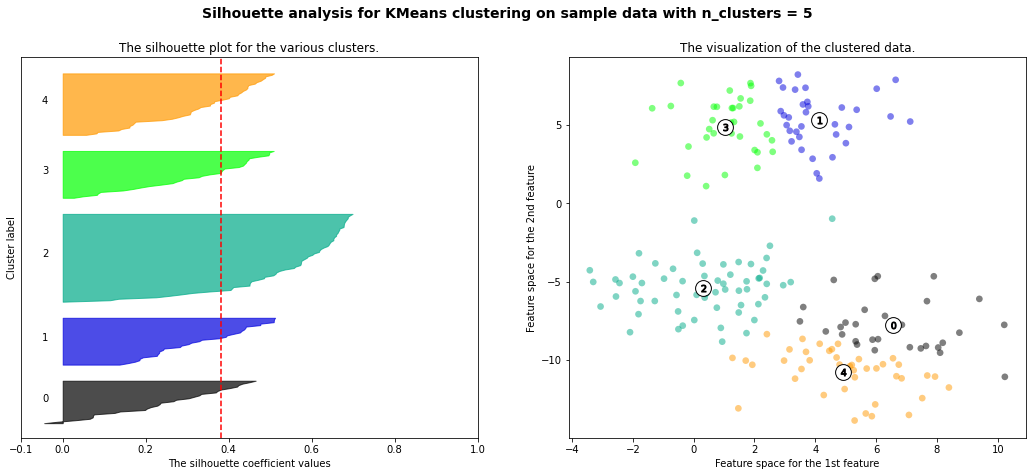

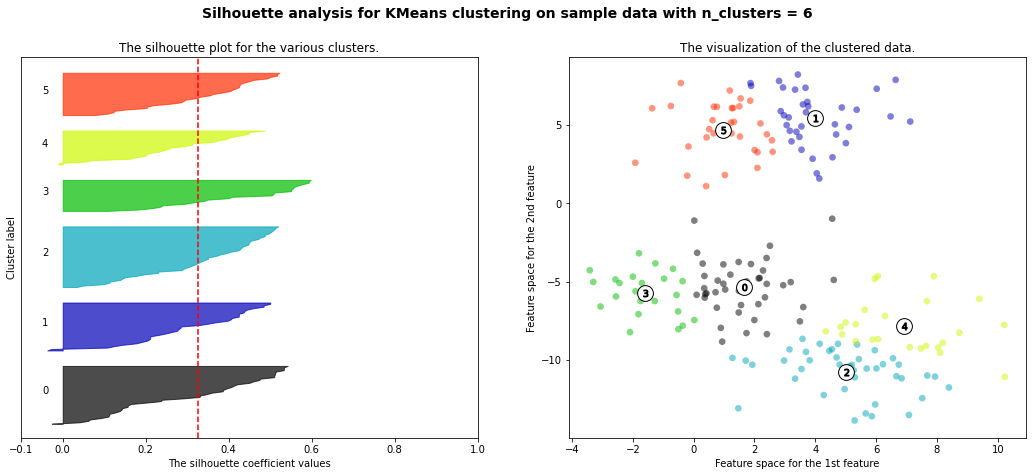

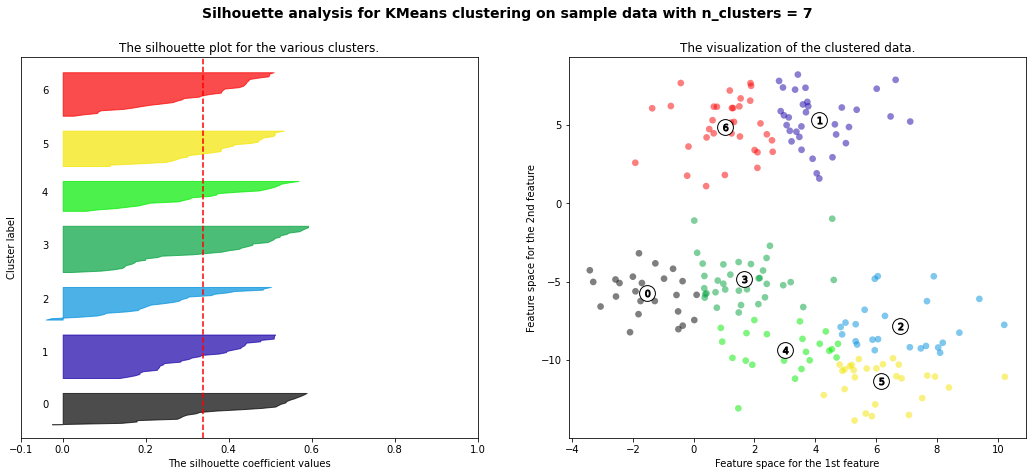

In [384]:
plot_silhouette(X, n_clusters=[2,3,4,5,6,7])

# External Indices

The Rand index does not ensure to obtain a value close to 0.0 for a random labelling. The adjusted Rand index corrects for chance and will give such a baseline.

**Pros**

    Interpretability: The unadjusted Rand index is proportional to the number of sample pairs whose labels are the same in both labels_pred and labels_true, or are different in both.

    Random (uniform) label assignments have an adjusted Rand index score close to 0.0 for any value of n_clusters and n_samples (which is not the case for the unadjusted Rand index or the V-measure for instance).

    Bounded range: Lower values indicate different labelings, similar clusterings have a high (adjusted or unadjusted) Rand index, 1.0 is the perfect match score. The score range is [0, 1] for the unadjusted Rand index and [-1, 1] for the adjusted Rand index.

    No assumption is made on the cluster structure: The (adjusted or unadjusted) Rand index can be used to compare all kinds of clustering algorithms, and can be used to compare clustering algorithms such as k-means which assumes isotropic blob shapes with results of spectral clustering algorithms which can find cluster with “folded” shapes.
    
    
**Cons**

    Contrary to inertia, the (adjusted or unadjusted) Rand index requires knowledge of the ground truth classes which is almost never available in practice or requires manual assignment by human annotators (as in the supervised learning setting).

    However (adjusted or unadjusted) Rand index can also be useful in a purely unsupervised setting as a building block for a Consensus Index that can be used for clustering model selection (TODO).

    The unadjusted Rand index is often close to 1.0 even if the clusterings themselves differ significantly. This can be understood when interpreting the Rand index as the accuracy of element pair labeling resulting from the clusterings: In practice there often is a majority of element pairs that are assigned the different pair label under both the predicted and the ground truth clustering resulting in a high proportion of pair labels that agree, which leads subsequently to a high score.

In [387]:
from sklearn.metrics import rand_score,adjusted_rand_score

# usando k=3
clustering = KMeans(n_clusters=3).fit(X)
print('Rand Score:{}'.format(rand_score(y, clustering.labels_)))
print('Adjusted Rand Score:{}'.format(adjusted_rand_score(y, clustering.labels_)))

Rand Score:0.9676381909547739


In [390]:
# usando k=5
clustering = KMeans(n_clusters=5).fit(X)
print('Rand Score:{}'.format(rand_score(y, clustering.labels_)))
print('Adjusted Rand Score:{}'.format(adjusted_rand_score(y, clustering.labels_)))

Rand Score:0.8705025125628141
Adjusted Rand Score:0.6797166293810589


In [392]:
# usando k=10
clustering = KMeans(n_clusters=10).fit(X)
print('Rand Score:{}'.format(rand_score(y, clustering.labels_)))
print('Adjusted Rand Score:{}'.format(adjusted_rand_score(y, clustering.labels_)))

Rand Score:0.7638190954773869
Adjusted Rand Score:0.35312495698969126


In [405]:
2/3

0.6666666666666666

In [406]:
(4/6)

0.6666666666666666

In [398]:
from sklearn.metrics import rand_score,adjusted_rand_score,homogeneity_score,completeness_score,v_measure_score,adjusted_mutual_info_score


def bench_clustering(estimator, name, data):
    estimator.fit(data)
    
    # A short explanation for every score:
    # homogeneity:          each cluster contains only members of a single class (range 0 - 1)
    # completeness:         all members of a given class are assigned to the same cluster (range 0 - 1)
    # v_measure:            harmonic mean of homogeneity and completeness
    # adjusted_rand:        similarity of the actual values and their predictions,
    #                       ignoring permutations and with chance normalization
    #                       (range -1 to 1, -1 being bad, 1 being perfect and 0 being random)
    # adjusted_mutual_info: agreement of the actual values and predictions, ignoring permutations
    #                       (range 0 - 1, with 0 being random agreement and 1 being perfect agreement)
    # silhouette:           uses the mean distance between a sample and all other points in the same class,
    #                       as well as the mean distance between a sample and all other points in the nearest cluster
    #                       to calculate a score (range: -1 to 1, with the former being incorrect,
    #                       and the latter standing for highly dense clustering.
    #                       0 indicates overlapping clusters.
    
    print('%-9s \thomogeneity: %.3f \tcompleteness: %.3f \tv-measure: %.3f \tadjusted-rand: %.3f \t'
          'adjusted-mutual-info: %.3f \tsilhouette: %.3f'
          % (name, 
#              estimator.inertia_,
             homogeneity_score(y, estimator.labels_),
             completeness_score(y, estimator.labels_),
             v_measure_score(y, estimator.labels_),
             adjusted_rand_score(y, estimator.labels_),
             adjusted_mutual_info_score(y,  estimator.labels_),
             silhouette_score(data, estimator.labels_,
                                      metric='euclidean'))) 
    
bench_clustering(clustering, 'kmeans', X)

kmeans    	homogeneity: 0.907 	completeness: 0.449 	v-measure: 0.601 	adjusted-rand: 0.376 	adjusted-mutual-info: 0.589 	silhouette: 0.371


# Mall Customers Case

In [211]:
dataset=pd.read_csv(r'../../Data/Mall_Customers.csv')

In [212]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [213]:
X = dataset.iloc[:,3:5]
# y=  dataset.iloc[:,-1]

Text(0, 0.5, 'Spending Score (1-100)')

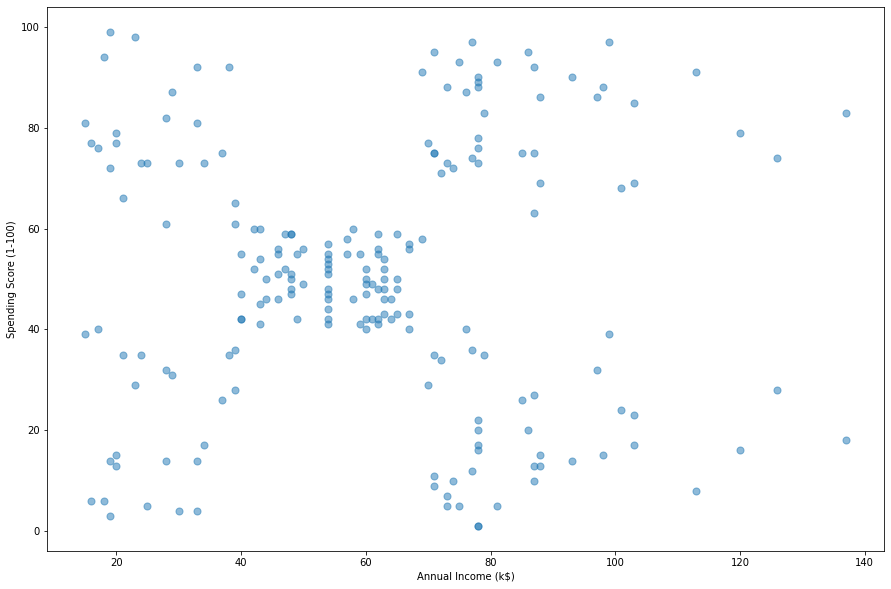

In [214]:
figure=plt.figure(figsize=(15,10))
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, alpha=0.5)
plt.xlabel(dataset.columns[3])
plt.ylabel(dataset.columns[4])

C:\Users\fabio\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


Text(0, 0.5, 'Score')

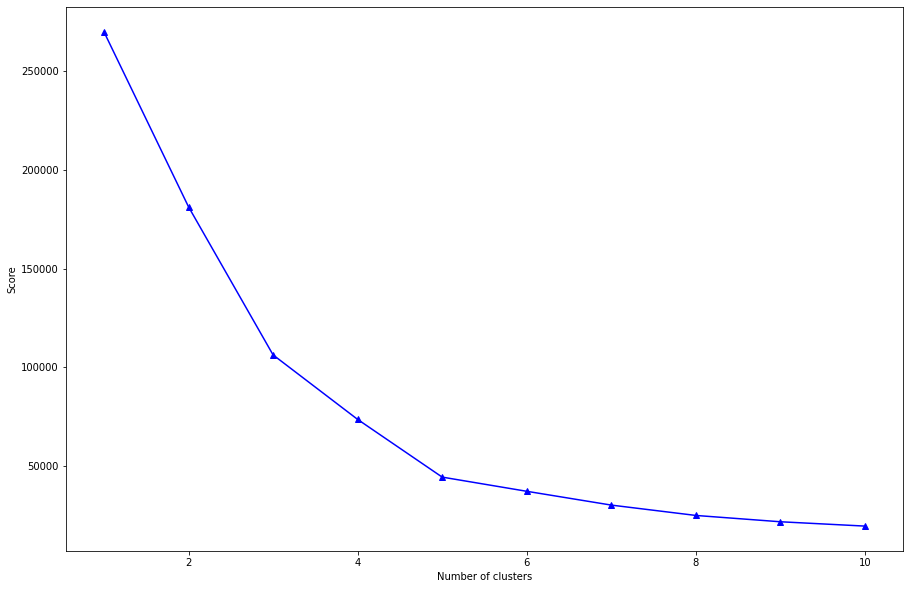

In [215]:
scores={}

for i in range(1,11):
    K_model = KMeans(n_clusters=i, init='k-means++', max_iter=300)
    K_model.fit(X)
    scores[i] = K_model.inertia_

figure=plt.figure(figsize=(15,10))
plt.plot(scores.keys(), scores.values(),'blue', marker='^')
plt.xlabel('Number of clusters')
plt.ylabel('Score')

In [216]:
# Cotovelo em k=5

K_model = KMeans(n_clusters=5, init='k-means++', max_iter=300)
y_kmeans = K_model.fit_predict(X)

Text(0, 0.5, 'Spending Score (1-100)')

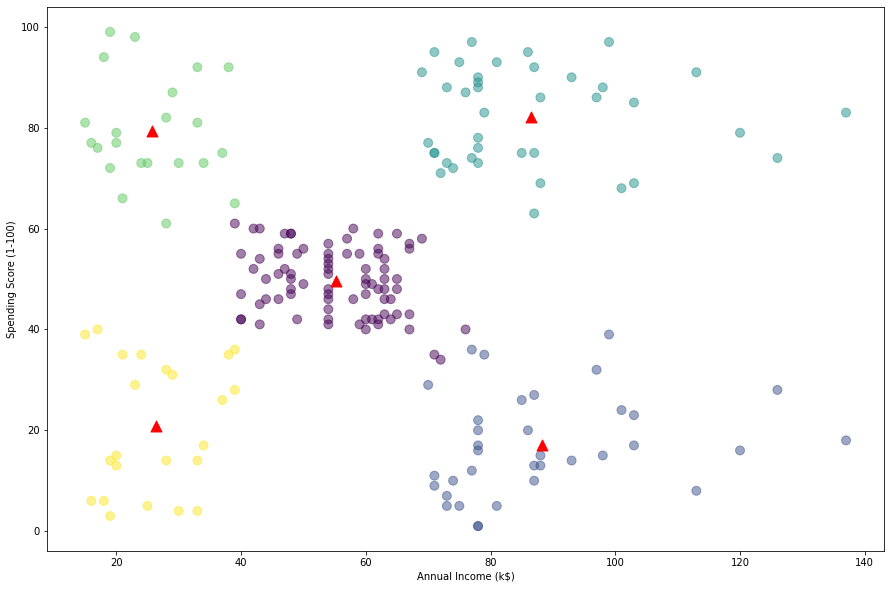

In [218]:
figure=plt.figure(figsize=(15,10))

plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y_kmeans, s=80, alpha=0.5)
plt.scatter(K_model.cluster_centers_[:,0], K_model.cluster_centers_[:,1], marker='^', c='red', s=120)
plt.xlabel(dataset.columns[3])
plt.ylabel(dataset.columns[4])

In [52]:
# figure=plt.figure(figsize=(15,10))


# plt.scatter(X[y_kmeans==0][:,0], X[y_kmeans==0][:,1], s=100, c='green', label = 'cls_1')
# plt.scatter(X[y_kmeans==1][:,0], X[y_kmeans==1][:,1], s=100, c='blue', label = 'cls_2')
# plt.scatter(X[y_kmeans==2][:,0], X[y_kmeans==2][:,1], s=100, c='red', label = 'cls_3')
# plt.scatter(X[y_kmeans==3][:,0], X[y_kmeans==3][:,1], s=100, c='yellow', label = 'cls_4')
# plt.scatter(X[y_kmeans==4][:,0], X[y_kmeans==4][:,1], s=100, c='magenta', label = 'cls_5')
# plt.scatter(K_model.cluster_centers_[:,0], K_model.cluster_centers_[:,1], s=200, marker='^', c='red', label='centroids')
# plt.xlabel(dataset.columns[3])
# plt.ylabel(dataset.columns[4])
# plt.legend()

# Silhuetta 

O coeficiente Silhouette é calculado ponto a ponto, que leva em consideração as distâncias médias intra-cluster e inter-cluster -  o que pode representar uma vantagem quanto a inercia - que considera apenas a variância intra-cluster. Para tal, são calculados dois scores: 

	- a - média das distância entre determinado ponto X_i  e os demais membro daquele cluster (média intra cluster) 
	- b - média das distâncias entre determinado X_i  e os pontos do que pertencem ao cluster mais próximo (intert-cluster)

Assim, s é dado por 

$ s=\frac{b−a}{max⁡(a,b)} $


**Advantages**
- The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.
- The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

**Drawbacks**
- The Silhouette Coefficient is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.

In [220]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(X, y_kmeans, metric='euclidean')

0.553931997444648

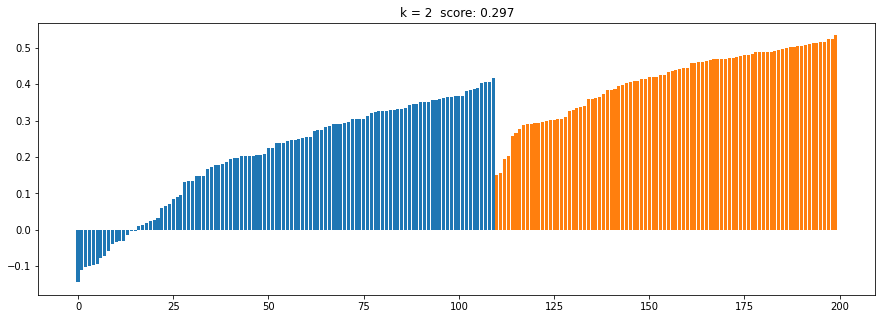

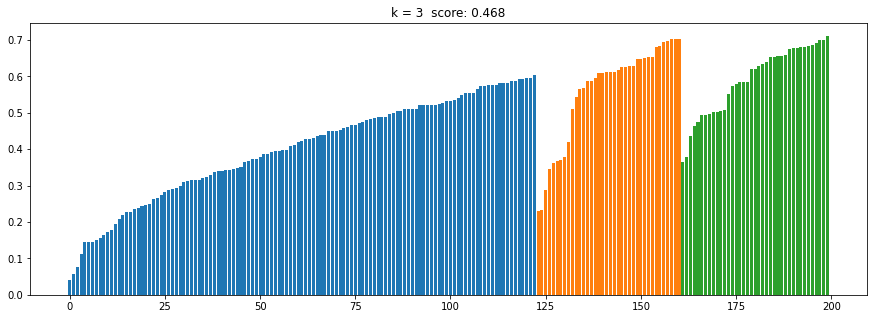

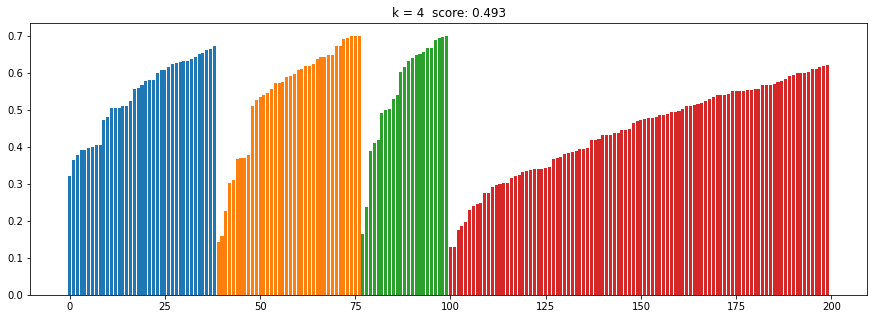

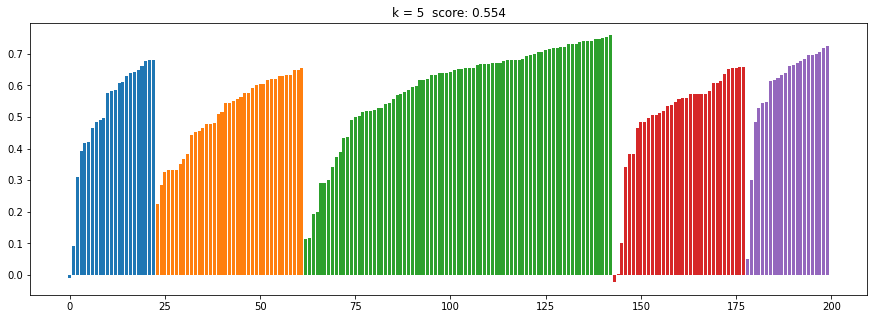

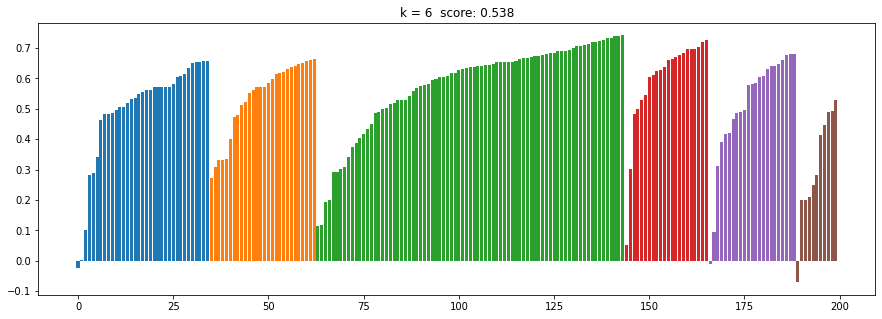

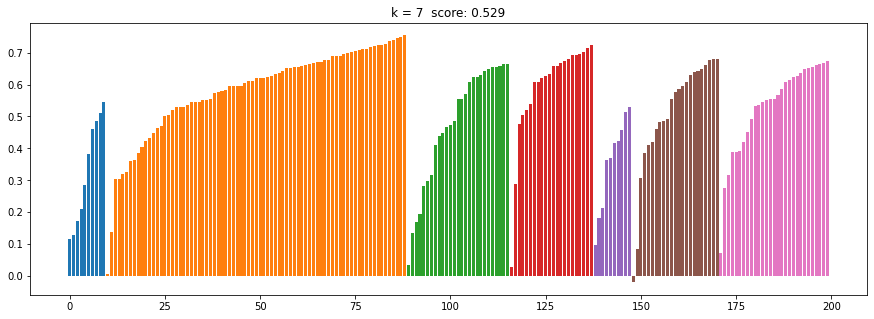

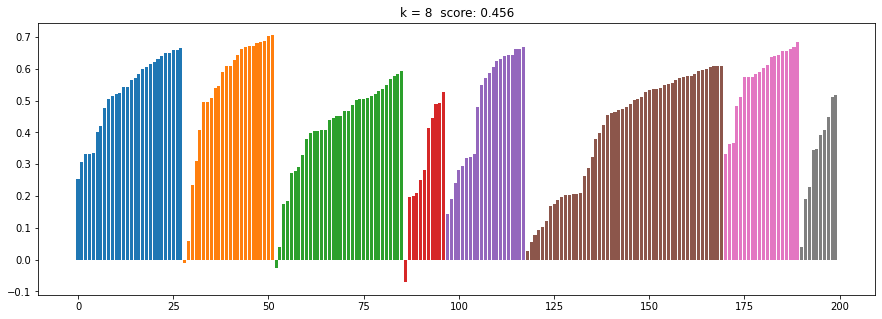

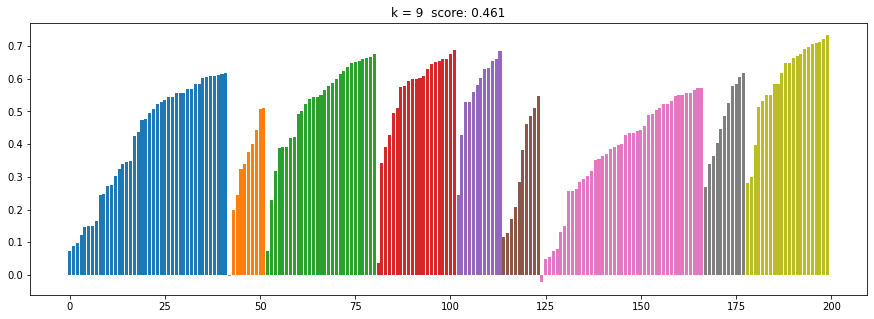

In [223]:
for n_cl in np.arange(2,10):

    fig, axes= plt.subplots(1,1,figsize=(15,5))

    K_model = KMeans(n_clusters=n_cl, init='k-means++', max_iter=300)
    y_kmeans = K_model.fit_predict(X)

    s = silhouette_samples(X, y_kmeans, metric='euclidean')

    left=0
    for y in np.unique(y_kmeans):
        s_i = s[y_kmeans ==y]
        s_i = np.sort(s_i)
        n_points= len(s_i)
        plt.bar(np.arange(left,left + n_points),s_i)
        left+=n_points
        
    silhouette = silhouette_score(X, y_kmeans, metric='euclidean')
    plt.title('k = {}  score: {:.3f}'.format(n_cl, silhouette))
    plt.show()

In [78]:
import matplotlib.cm as cm

def plot_silhouette(X, n_clusters=[2,3,4,5,6,7]):

    X= np.array(X)
    
    for n_clusters in n_clusters:

        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=180, lw=0, alpha=0.5,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=250, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.2968969162503008
For n_clusters = 3 The average silhouette_score is : 0.46761358158775435
For n_clusters = 4 The average silhouette_score is : 0.4931963109249047
For n_clusters = 5 The average silhouette_score is : 0.553931997444648
For n_clusters = 6 The average silhouette_score is : 0.5376203956398481
For n_clusters = 7 The average silhouette_score is : 0.5270287298101395


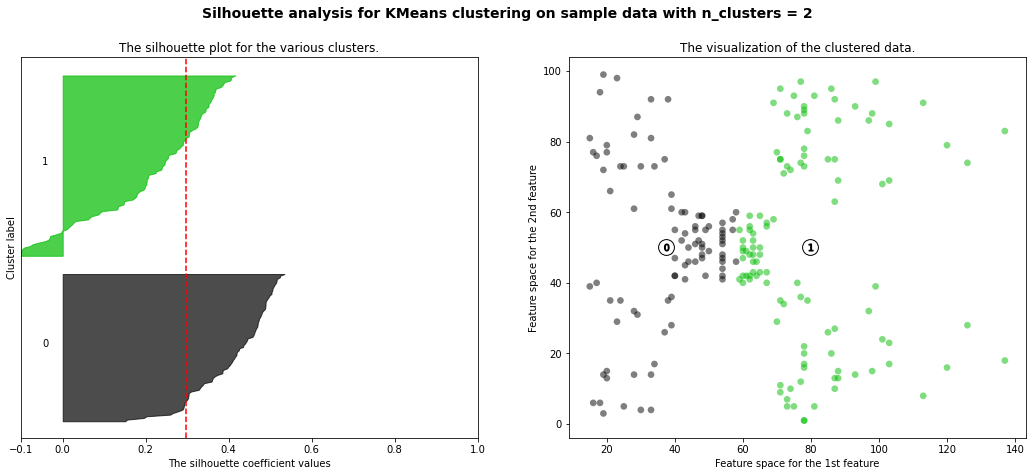

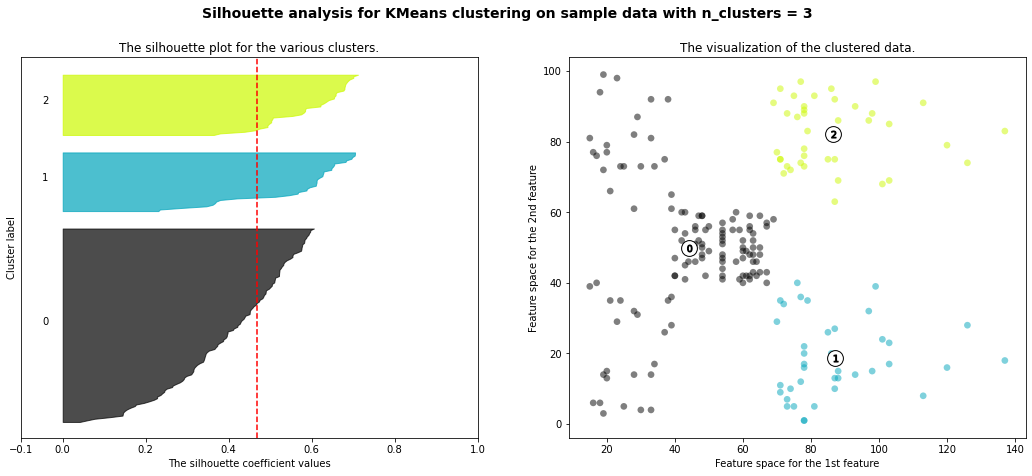

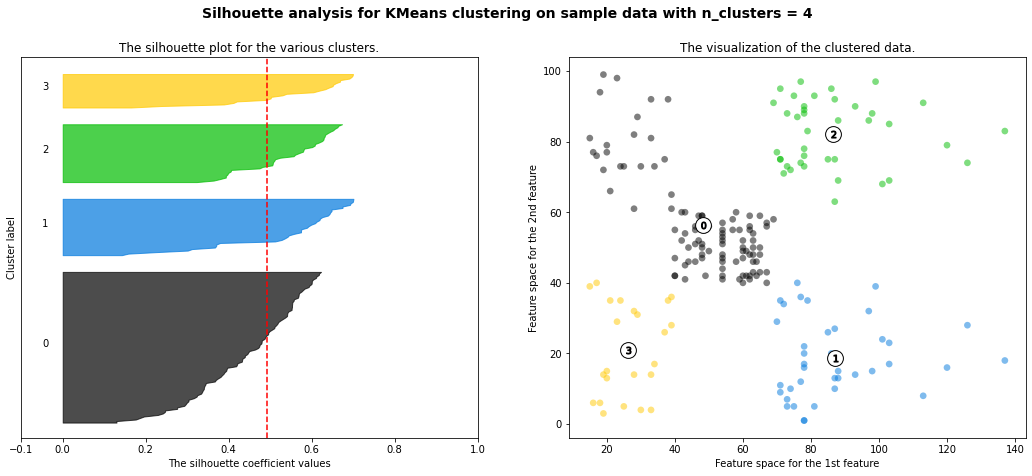

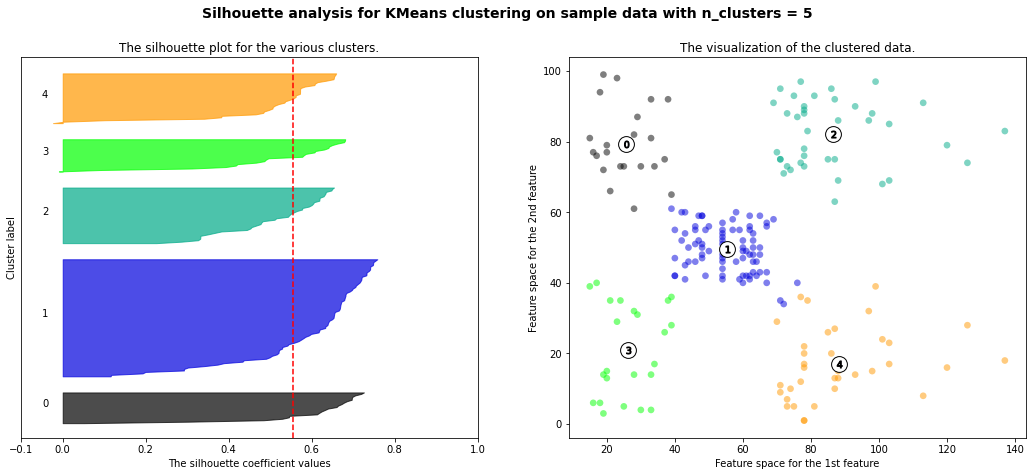

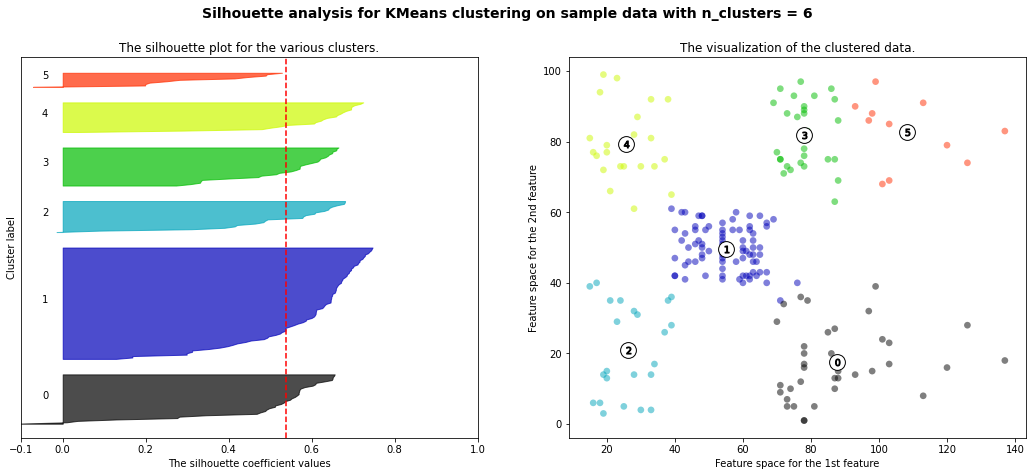

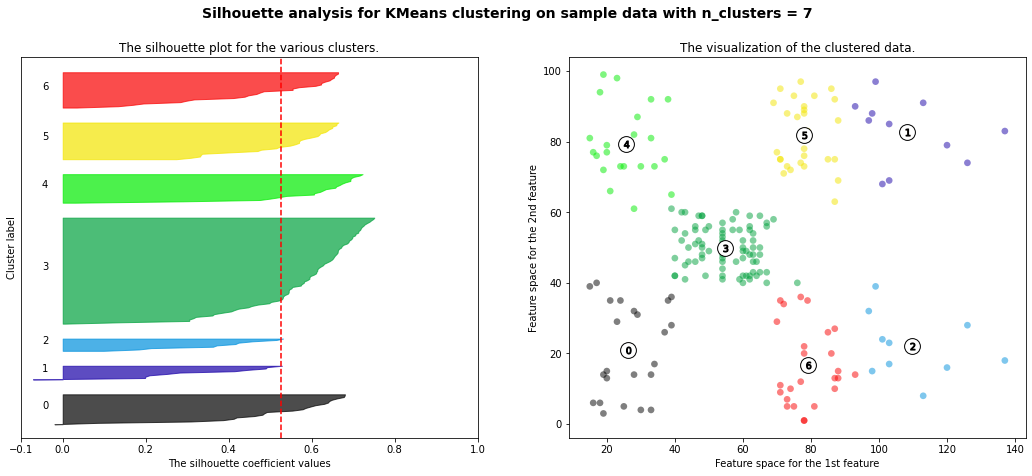

In [79]:
plot_silhouette(X, n_clusters=[2,3,4,5,6,7])

In [339]:
# selecionando k = 5 (ineria + silhuetta)

clustering = KMeans(n_clusters=5, init='k-means++', max_iter=300)
clustering.fit(X)
labels = clustering.labels_
centroids = clustering.cluster_centers_
labels


array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0,
       4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [345]:
def silhuetta_ponto(X, y):
    
    X = np.array(X)
    
    s_point = []
        
    for index,point in enumerate(X):
        
        # Seleciono o cluster que o ponto faz parte
        cluster_p = y[index]
        
        points_intra = X[labels==cluster_p]
        n_intra = points_intra.shape[0]
        
        # Inicializo distancias
        distance_intra = 0
        distance_inter = {}

        for p in points_intra:
            distance_intra += np.sqrt((point[0] - p[0])**2 + (point[1] - p[1])**2)
        a = distance_intra/(n_intra)
        
        for cluster_ in [c_ for c_ in np.unique(y) if c_ != cluster_p]:
#             print(cluster_)
            points_inter = X[labels!=cluster_]
            n_inter = points_inter.shape[0]
            aux_dist=0
            
            for p in points_inter:
                aux_dist += np.sqrt((point[0] - p[0])**2 + (point[1] - p[1])**2)
                
            distance_inter[cluster_] = aux_dist/ (n_inter)
            
#         print(distance_inter)
#         print(min(distance_inter.items(), key=lambda x: x[1])[1])
        
        b = min(distance_inter.items(), key=lambda x: x[1])[1]
        
        s = (b-a)/max(a,b)
        
        s_point.append(s)
        
    return np.array(s_point)

In [346]:
silhuetta_ponto(X,clustering.labels_)

array([0.5010549 , 0.71788883, 0.65347503, 0.72255691, 0.48846696,
       0.72588469, 0.66252642, 0.67336695, 0.64255575, 0.70266507,
       0.69727712, 0.63538296, 0.70088977, 0.74583062, 0.69929615,
       0.74950853, 0.5679848 , 0.61701027, 0.63920724, 0.64430186,
       0.56185042, 0.71967611, 0.65657358, 0.71624537, 0.68752798,
       0.73273463, 0.5855752 , 0.47103946, 0.59069462, 0.70770724,
       0.62387393, 0.67548857, 0.59751873, 0.64034834, 0.6445755 ,
       0.68142846, 0.63202944, 0.6170242 , 0.53648596, 0.57934657,
       0.37254775, 0.57580509, 0.32492289, 0.34412833, 0.47214816,
       0.35534085, 0.42609038, 0.43670408, 0.39265309, 0.39265309,
       0.48222847, 0.39956824, 0.48617737, 0.41302878, 0.47298192,
       0.42389613, 0.52170625, 0.49873836, 0.55384494, 0.52935677,
       0.51102452, 0.52301298, 0.56313762, 0.47798145, 0.58126863,
       0.48814778, 0.58253107, 0.57350738, 0.48814778, 0.56578848,
       0.55858833, 0.51276434, 0.60103055, 0.55402545, 0.61620

In [349]:
silhouette_samples(X,clustering.labels_)

array([ 0.41700493,  0.69637752,  0.6399526 ,  0.6964831 ,  0.39230007,
        0.6981303 ,  0.64910316,  0.65972193,  0.63021343,  0.66350398,
        0.67788678,  0.62355268,  0.68003912,  0.71908624,  0.68070792,
        0.72573786,  0.48557434,  0.54505971,  0.58062414,  0.631684  ,
        0.46597803,  0.6774284 ,  0.64167396,  0.67170097,  0.66126882,
        0.70488566,  0.48931822,  0.30121073,  0.49570828,  0.6847372 ,
        0.60630845,  0.612474  ,  0.57697817,  0.61775968,  0.60922585,
        0.63936997,  0.58581667,  0.52897452,  0.42116018,  0.48378692,
        0.09342298,  0.54589636, -0.00927769,  0.1170758 ,  0.31116673,
        0.0507214 ,  0.38841392,  0.43312564,  0.29204034,  0.29204034,
        0.5203998 ,  0.30155503,  0.51561237,  0.34144075,  0.48988757,
        0.37332421,  0.59860522,  0.54128572,  0.63883859,  0.59367906,
        0.55806656,  0.57952023,  0.64920886,  0.50415514,  0.67809813,
        0.52881485,  0.68358333,  0.66547762,  0.52881485,  0.65

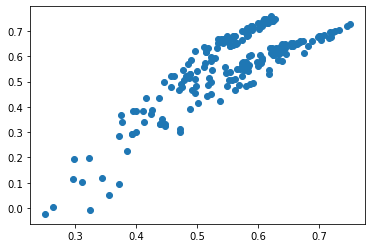

In [350]:
plt.scatter(silhuetta_ponto(X,clustering.labels_),silhouette_samples(X,clustering.labels_))

# Silhuetta Simplificada

Silhueta Simplificada: a(i) e b(i) são calculados como a distância do i-ésimo objeto ao centróide do cluster em questão. Complexidade O(N)


# Outras métricas (internal indexes)

### calinski_harabasz_score

**Advantages**

    -The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.
    -The score is fast to compute.

**Drawbacks**

    -The Calinski-Harabasz index is generally higher for convex clusters than other concepts of clusters, such as density based -clusters like those obtained through DBSCAN.

### davies_bouldin_score

**Advantages**

    The computation of Davies-Bouldin is simpler than that of Silhouette scores.

    The index is computed only quantities and features inherent to the dataset.

**Drawbacks**

    The Davies-Boulding index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained from DBSCAN.

    The usage of centroid distance limits the distance metric to Euclidean space.



In [331]:
from sklearn.metrics import calinski_harabasz_score,davies_bouldin_score

scores={}

for i in range(2,11):
    clustering = KMeans(n_clusters=i, init='k-means++', max_iter=300)
    clustering.fit(X)
    scores[i]={}
    scores[i]['inertia'] = clustering.inertia_
    scores[i]['CH'] = calinski_harabasz_score(X, clustering.labels_)
    scores[i]['DB'] = davies_bouldin_score(X, clustering.labels_)

    
# plt.plot(scores.keys(), scores.values(),'blue', marker='^')
# plt.xlabel('Number of clusters')
# plt.ylabel('Score')

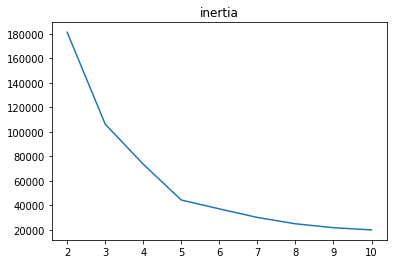

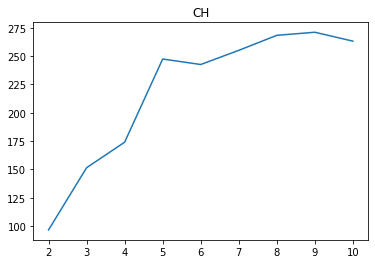

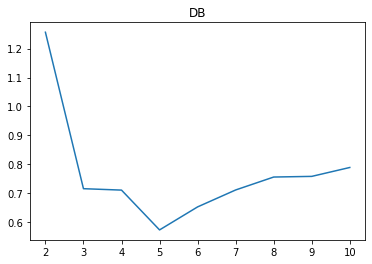

In [337]:
scores_df = pd.DataFrame(scores).T

for metric in scores_df.columns:
    plt.plot(scores_df.index,scores_df[metric])
    plt.title(metric)
    plt.show()